In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing

In [3]:
X = np.array([[2.7810836,2.550537003],[1.465489372, 2.362125076],[3.396561688, 4.400293529],[1.38807019, 1.850220317],
              [3.06407232, 3.005305973],[7.627531214, 2.759262235],[5.332441248, 2.088626775],[6.922596716, 1.77106367],
              [8.675418651, -0.2420686549],[7.673756466, 3.508563011]])

Y = np.array([0,0,0,0,0,1,1,1,1,1])

In [4]:
# constructing matrices
m,n = X.shape[0], 2
ones = np.ones((m,1))
A = np.append(ones, X, axis=1)
b = Y

# data preprocessing
#A[:, 1] = preprocessing.scale(A[:,1])
#A[:,2] = preprocessing.scale(A[:,2]) 

In [19]:
def learn_parameters(theta, A, b, m, n, alpha=0.01):
    for i in range(0, n+1):
        value = 0 
        for j in range(0, m):
            exponent = (np.dot(theta.T, np.reshape(A[j:j+1,],(n+1,1))))[0,0]
            value += (b[j]-(1/(1+np.exp(-exponent))))*A[j,i]
        theta[i,0] += alpha*value
    return theta

In [20]:
# initialize parameter vector theta
theta  = np.zeros((n+1, 1))

# define learning rate 
alpha = 0.01



while True:
    new_theta = learn_parameters(np.copy(theta),A,b,m,n,alpha)
    l = list(b)
    no_of_zeros = l.count(0)
    no_of_ones = l.count(1)
    likelihood_prev, likelihood_new = 1,1
    for i in range(0, m):
        coeff_prev = (np.dot(theta.T, np.reshape(A[i:i+1,], (n+1,1))))[0,0]
        coeff_new = (np.dot(new_theta.T, np.reshape(A[i:i+1,], (n+1,1))))[0,0]
        if b[i] == 0:
            likelihood_prev *= (1-(1/(1+np.exp(-coeff_prev))))
            likelihood_new *= (1-(1/(1+np.exp(-coeff_new))))
        else:
            likelihood_prev *= (1/(1+np.exp(-coeff_prev)))
            likelihood_new *= (1/(1+np.exp(-coeff_new)))
    # convergence condition
    if abs(likelihood_prev-likelihood_new)<=0.00001:
        print(new_theta)
        break
    theta = np.copy(new_theta)



[[-1.58028541]
 [ 2.84289799]
 [-4.18501916]]


In [7]:
from sklearn import linear_model

In [8]:
clf = linear_model.LogisticRegression()
clf.fit(X,Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [9]:
clf.intercept_

array([-0.43104649])

In [10]:
clf.coef_

array([[ 0.80500337, -1.1224275 ]])

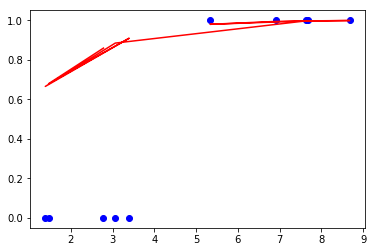

In [11]:
# visualization
coff = np.array([[-0.43104649],[0.80500337],[0]])
exp_clf = np.dot(A, coff)
y_clf = (1/(1+np.exp(-exp_clf)))

exp_grad = np.dot(A, new_theta)
y_grad = (1/(1+np.exp(-exp_grad)))


fig , aux = plt.subplots()
aux.plot(A[:,1],b,'bo' ,A[:,1],  y_clf,'r-')
plt.show()

In [12]:
A

array([[ 1.        ,  2.7810836 ,  2.550537  ],
       [ 1.        ,  1.46548937,  2.36212508],
       [ 1.        ,  3.39656169,  4.40029353],
       [ 1.        ,  1.38807019,  1.85022032],
       [ 1.        ,  3.06407232,  3.00530597],
       [ 1.        ,  7.62753121,  2.75926224],
       [ 1.        ,  5.33244125,  2.08862677],
       [ 1.        ,  6.92259672,  1.77106367],
       [ 1.        ,  8.67541865, -0.24206865],
       [ 1.        ,  7.67375647,  3.50856301]])

In [13]:
y_clf

array([[0.85908793],
       [0.67889044],
       [0.90914148],
       [0.66515552],
       [0.88447855],
       [0.99669544],
       [0.97939874],
       [0.99418607],
       [0.99857576],
       [0.99681576]])

In [14]:
b

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1])

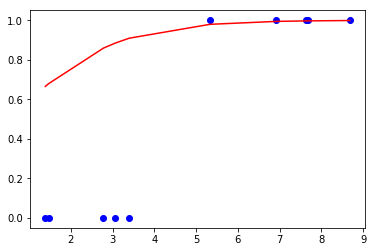

In [15]:
y_clf = np.sort(y_clf, axis=0)
fig, aux = plt.subplots()
aux.plot(np.sort(A[:,1], axis=0), b, 'bo', np.sort(A[:,1],axis=0), y_clf, 'r-')
plt.show()

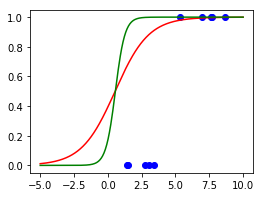

In [21]:
coff = np.array([[-0.43104649],[0.80500337]])

X_test = np.reshape(np.linspace(-5, 10, 300),(300,1))
ones = np.ones((300,1))
A_new = np.append(ones, X_test, axis=1)

coff_grad  = np.array([[-1.58028541],[2.84289799]])
exp_clf = np.dot(A_new, coff)
exp_grad = np.dot(A_new, coff_grad)
y_clf = (1/(1+np.exp(-exp_clf)))
y_grad = (1/(1+np.exp(-exp_grad)))

#fig, aux = plt.subplots()
plt.figure(1, figsize=(4,3))
plt.clf()
plt.plot(np.sort(A[:,1]), b, 'bo')
plt.plot(X_test, y_clf, 'r-')
plt.plot(X_test, y_grad, 'g-')
plt.show()